In [16]:
%matplotlib inline

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Simple Python

In [86]:
a = 1

In [87]:
a

1

In [88]:
b = [1,2,3]

In [89]:
b

[1, 2, 3]

In [90]:
for element in b:
    print element

1
2
3


In [91]:
b[1:3]

[2, 3]

In [92]:
b[0]

1

In [93]:
c = np.array(b)

In [94]:
c

array([1, 2, 3])

In [95]:
c * np.arange(3)

array([0, 2, 6])

In [96]:
c.dot(np.arange(3).T)

8

# Numpy/scipy

In [97]:
np.random.randn(100, 10)

array([[ 1.51314981,  0.19897806,  0.43595272,  0.7502742 ,  0.09201065,
         2.18537701,  0.41371865,  1.37543361,  0.95188254, -0.79559622],
       [-0.86569097,  0.59878636, -1.86090211, -0.3831269 , -0.37769694,
         0.67653527,  0.06863641, -1.27074226, -0.30238841, -0.55039756],
       [-0.66366751, -0.02671027,  0.09257828,  0.28358779,  2.21897869,
        -0.46211386,  1.47046609,  0.28731177,  1.67953936, -0.94642113],
       [-0.0618929 ,  0.02912541,  1.01915934, -1.49633626,  0.34230975,
        -0.15048171,  1.71587605,  1.11035473, -0.26717002, -0.26503901],
       [ 1.457026  ,  0.0828739 , -0.49943758,  0.6007565 ,  0.05881814,
         1.08731312,  1.01999547, -0.0077288 , -0.18416473,  0.36864554],
       [-1.58482444, -0.3565127 , -0.23428495,  0.0956649 , -0.33909655,
        -0.82804703, -0.80788438,  0.20852093,  0.15533758, -0.59363139],
       [-0.98711405, -0.41004325,  0.62472709,  1.76618   ,  0.03936248,
         0.47806873, -0.81688732,  0.33587775

In [98]:
np.arange(5)**2

array([ 0,  1,  4,  9, 16])

In [99]:
import matplotlib.pyplot as plt

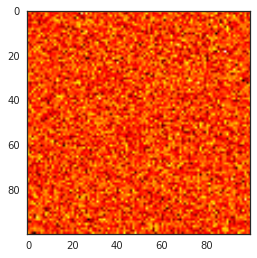

In [100]:
plt.imshow(np.random.randn(100, 100), cmap=plt.cm.hot)

In [101]:
t = np.linspace(0, 3, 100)

In [102]:
import seaborn as sns

In [103]:
sns.set_style('white')

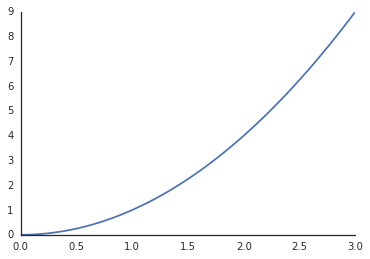

In [104]:
plt.plot(t, t**2)
sns.despine()

# Logistic function


The following function implements the logistic function:
$f(x) = \frac{1}{1 + e^{-k(x - x0)}}$

In [105]:
def logistic(x, x0=0, k=1.):
    return 1 / (1 + np.exp(-k * (x - x0)))

In [106]:
logistic(-1)

0.2689414213699951

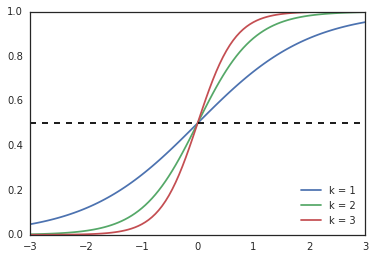

In [107]:
t = np.linspace(-3, 3, 100)


for k in [1, 2, 3]:
    plt.plot(t, logistic(t, k=k), label='k = %s' % k)

plt.legend(loc='lower right')
    
plt.axhline(.5, c='k', ls='--')

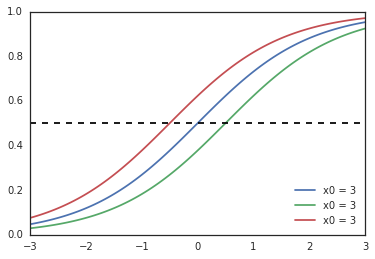

In [108]:
t = np.linspace(-3, 3, 100)


for x0 in [0, .5, -.5]:
    plt.plot(t, logistic(t, x0=x0), label='x0 = %s' % k)

plt.legend(loc='lower right')
    
plt.axhline(.5, c='k', ls='--')

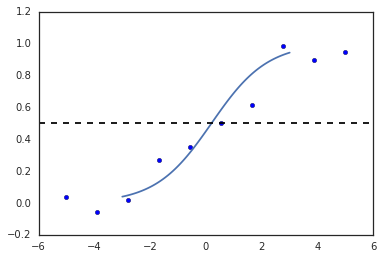

In [109]:
# x = np.array([])
x = np.linspace(-5, 5, 10)

x0 = .2
k = 1

y = logistic(x, x0, k) + np.random.randn(len(x)) * .1


plt.scatter(x, y)

plt.plot(t, logistic(t, x0, k))

plt.axhline(.5, c='k', ls='--')



In [110]:
def logistic_cost(pars, x,  y):
    
    x0, k = pars
    
    predictions = logistic(x, x0, k)
    
    return np.sum((y - predictions) ** 2)

In [111]:
import scipy as sp

Optimization terminated successfully.
         Current function value: 0.053807
         Iterations: 48
         Function evaluations: 95


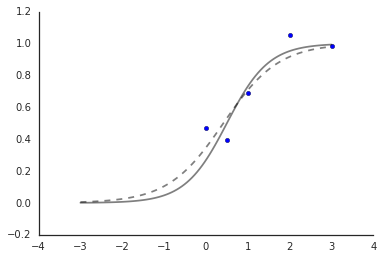

In [112]:
x = np.array([0, 1, 2., 3, .5])

x0 = .5
k = 2.

x = np.array([0, 1, 2., 3, .5])
samples = logistic(x, x0=x0, k=k) + np.random.randn(len(x)) * .1

plt.scatter(x, samples)

plt.plot(t, logistic(t, x0, k), c='k', alpha=.5)

x0_, k_ = sp.optimize.fmin(logistic_cost, [0, 1], (x, samples))

plt.plot(t, logistic(t, x0_, k_), ls='--', c='k', alpha=.5)

sns.despine()

In [113]:
import pymc
import numpy as np

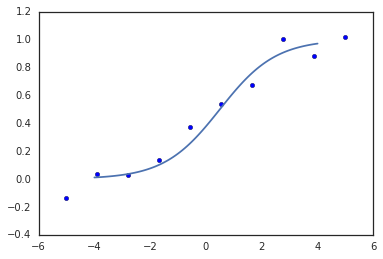

In [114]:
x = np.linspace(-5, 5, 10)
x0 = .5
k = 1.

samples = logistic(x, x0=x0, k=k) + np.random.randn(len(x)) * .1

plt.scatter(x, samples)

x_ = np.linspace(-4, 4, 100)
plt.plot(x_, logistic(x_, x0, k))

In [115]:
k_prior = pymc.Normal('k', 0, 1.)
x0_prior = pymc.Normal('x0', 0, 1.)

In [116]:
@pymc.stochastic(observed=True)
def logistic_likelihood(value=samples, k=k_prior, x0=x0_prior, x=x):
    
    predictions = logistic(x, x0, k)
    
    residuals = predictions - value
    
    return pymc.normal_like(residuals, residuals.mean(), 1/residuals.std())

In [117]:
model = pymc.Model([k_prior, x0_prior, logistic_likelihood])

In [118]:
#Make a slightly pretty graph out of it
graph = pymc.graph.graph(model)
graph.write_png("graph.png")

True

In [119]:
from IPython.display import Image

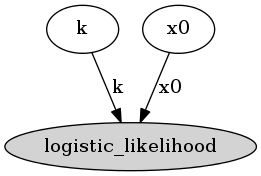

In [120]:
Image('graph.png')

In [121]:
sampler = pymc.MCMC(model, db='ram')

In [122]:
sampler.sample(5000)

 [-----------------100%-----------------] 5000 of 5000 complete in 0.9 sec

In [123]:
import matplotlib.pyplot as plt

In [124]:
%matplotlib inline

In [125]:
sampler.trace('x0')[:].mean(), sampler.trace('k')[:].mean()

(0.076566847817093456, 0.90832582894047842)

(array([    6.,    12.,    54.,   245.,   901.,  2048.,  1262.,   384.,
           78.,    10.]),
 array([-2.81247138, -2.29956746, -1.78666354, -1.27375962, -0.7608557 ,
        -0.24795178,  0.26495214,  0.77785606,  1.29075998,  1.80366389,
         2.31656781]),
 <a list of 10 Patch objects>)

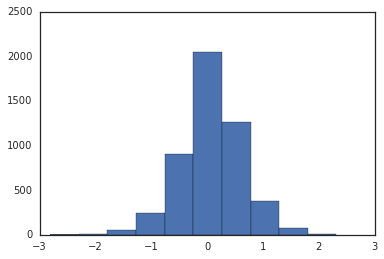

In [126]:
plt.hist(sampler.trace('x0')[:])

In [127]:
import seaborn as sns

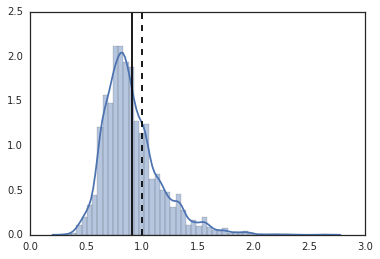

In [128]:
sns.distplot(sampler.trace('k')[:])

plt.axvline(sampler.trace('k')[:].mean(), c='k')
plt.axvline(k, c='k', ls='--')

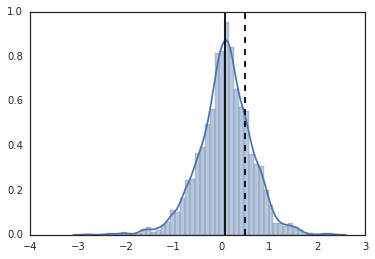

In [129]:
sns.distplot(sampler.trace('x0')[:])

plt.axvline(sampler.trace('x0')[:].mean(), c='k')
plt.axvline(x0, c='k', ls='--')

In [130]:
k_traces = sampler.trace('k')[:]
x0_traces = sampler.trace('x0')[:]

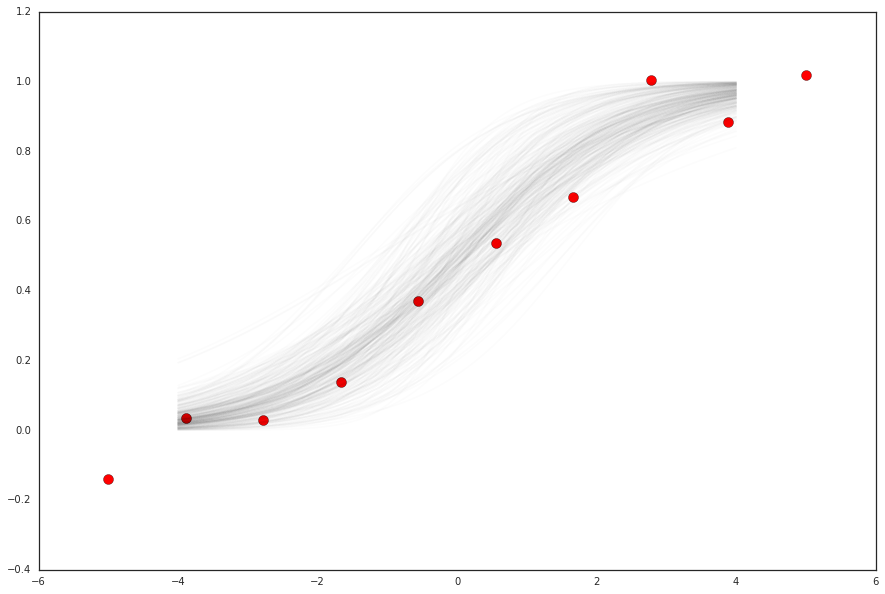

In [131]:
plt.figure(figsize=(15, 10))

x_ = np.linspace(-4, 4, 100)


for i in np.arange(4000, 5000, 3):
    plt.plot(x_, logistic(x_, x0_traces[i], k_traces[i]), c='k', alpha=0.01)
    
plt.scatter(x, samples, c='r', s=100)

# Behavior

In [132]:
!ls /data

behavior.pandas    func_raw    masks   tdcs_data.csv
epi_in_anat_space  lost+found  struct  workflow_folders


In [1]:
import pandas
import seaborn as sns

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pandas.read_csv('/data/tdcs_data.csv')
df.shape

(52200, 12)

In [135]:
df.describe()

,RT,accuracy,angle,block,coherence,left_right,subj_idx,trial_NR
count,52200.000000,52200.000000,52200.0,52200.000000,52200.000000,52200.000000,52200.000000,52200.000000
mean,573.639885,0.729732,180.0,1.505747,0.217459,1.500000,8.655172,300.500000
std,225.551916,0.444103,0.0,0.499972,0.088321,0.500005,4.517767,173.206499
min,0.000000,0.000000,180.0,1.000000,0.065300,1.000000,1.000000,1.000000
25%,426.000000,0.000000,180.0,1.000000,0.155800,1.000000,5.000000,150.750000
50%,519.000000,1.000000,180.0,2.000000,0.206000,1.500000,9.000000,300.500000
75%,667.000000,1.000000,180.0,2.000000,0.276400,2.000000,13.000000,450.250000
max,2013.000000,1.000000,180.0,2.000000,0.417100,2.000000,17.000000,600.000000


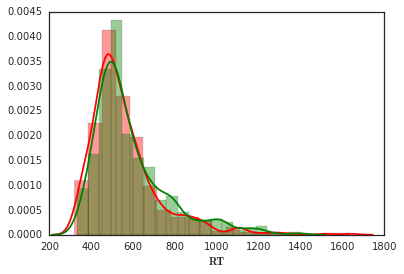

In [136]:
sns.distplot(df.ix[(df.dataset == 'berkeley') & (df.subj_idx == 2) & (df.acc_spd == 'spd')].RT, bins=20, color='r')
sns.distplot(df.ix[(df.dataset == 'berkeley') & (df.subj_idx == 2) & (df.acc_spd == 'acc')].RT, bins=20, color='g')

# split-apply-combine

In [137]:
df.groupby('acc_spd').mean()

,RT,accuracy,angle,block,coherence,left_right,subj_idx,trial_NR
acc_spd,,,,,,,,
acc,646.669585,0.762547,180.0,1.505741,0.217812,1.502784,8.643321,302.479246
spd,500.928470,0.697060,180.0,1.505754,0.217107,1.497228,8.666973,298.529380


In [138]:
np.round(df.groupby(['dataset', 'acc_spd']).mean()[['RT', 'accuracy']], 2)

RT  accuracy
dataset   acc_spd                  
amsterdam acc      640.40      0.76
          spd      522.00      0.71
berkeley  acc      622.02      0.77
          spd      482.71      0.71
leiden    acc      678.60      0.76
          spd      497.56      0.67

In [139]:
df_subj = df.groupby(['subj_idx', 'dataset', 'tdcs', 'acc_spd'], as_index=False).mean()

In [140]:
np.round(df.groupby(['dataset', 'tdcs', 'acc_spd']).agg([np.mean, np.std])[['RT', 'accuracy']], 2)

RT         accuracy      
                            mean     std     mean   std
dataset   tdcs   acc_spd                               
amsterdam anodal acc      646.14  232.79     0.76  0.43
                 spd      526.44  178.83     0.70  0.46
          sham   acc      634.63  236.40     0.76  0.43
                 spd      517.58  173.58     0.71  0.45
berkeley  anodal acc      602.48  228.13     0.75  0.43
                 spd      476.82  166.69     0.71  0.46
          sham   acc      643.46  246.00     0.79  0.41
                 spd      488.88  150.08     0.72  0.45
leiden    anodal acc      681.48  268.51     0.75  0.43
                 spd      505.94  172.02     0.67  0.47
          sham   acc      675.74  281.22     0.77  0.42
                 spd      489.15  164.19     0.67  0.47

In [141]:
df_subj = df.groupby(['subj_idx', 'dataset', 'tdcs', 'acc_spd'], as_index=False).mean()

df_subj.head(10)

,subj_idx,dataset,tdcs,acc_spd,RT,accuracy,angle,block,coherence,left_right,trial_NR
0,1,berkeley,anodal,acc,461.837288,1.000000,180.0,2.0,0.4171,1.494915,290.972881
1,1,berkeley,anodal,spd,443.265574,0.996721,180.0,2.0,0.4171,1.504918,309.714754
2,1,leiden,anodal,acc,789.293729,0.960396,180.0,1.0,0.2864,1.511551,310.181518
3,1,leiden,anodal,spd,547.451178,0.902357,180.0,1.0,0.2864,1.488215,290.622896
4,1,leiden,sham,acc,727.930159,0.977778,180.0,2.0,0.2864,1.501587,307.838095
5,1,leiden,sham,spd,483.508772,0.873684,180.0,2.0,0.2864,1.498246,292.389474
6,2,amsterdam,anodal,acc,784.335423,0.699060,180.0,1.0,0.2261,1.476489,301.887147
7,2,amsterdam,anodal,spd,500.309609,0.572954,180.0,1.0,0.2261,1.526690,298.925267
8,2,amsterdam,sham,acc,773.409677,0.729032,180.0,2.0,0.2261,1.477419,303.032258
9,2,amsterdam,sham,spd,486.882759,0.613793,180.0,2.0,0.2261,1.524138,297.793103


In [142]:
df_subj.groupby(['dataset', 'tdcs', 'acc_spd']).agg([np.mean, np.std])[['RT', 'accuracy']]

RT              accuracy          
                                mean         std      mean       std
dataset   tdcs   acc_spd                                            
amsterdam anodal acc      645.792239   94.415129  0.757666  0.114388
                 spd      526.337169   68.344288  0.701475  0.095034
          sham   acc      633.407696   92.270336  0.759489  0.100151
                 spd      518.089836   56.332272  0.709534  0.113810
berkeley  anodal acc      601.424115  125.768931  0.753072  0.112101
                 spd      479.204293   99.410248  0.707868  0.112450
          sham   acc      642.505276  110.602028  0.787193  0.075783
                 spd      488.597690   65.610475  0.720669  0.056623
leiden    anodal acc      681.992505  132.734350  0.751711  0.181006
                 spd      506.690529   69.802201  0.666232  0.128057
          sham   acc      674.465448  195.125856  0.766307  0.157853
                 spd      490.338682   98.731230  0.676676  0.127185

In [143]:
for g, d in df.groupby(['dataset', 'subj_idx', 'acc_spd']):
    print g, d.RT.mean()

('amsterdam', 2, 'acc') 778.950715421
('amsterdam', 2, 'spd') 493.490367776
('amsterdam', 3, 'acc') 612.182741117
('amsterdam', 3, 'spd') 494.05090312
('amsterdam', 4, 'acc') 690.91954023
('amsterdam', 4, 'spd') 627.697123519
('amsterdam', 5, 'acc') 511.988764045
('amsterdam', 5, 'spd') 432.604852686
('amsterdam', 6, 'acc') 581.721283784
('amsterdam', 6, 'spd') 445.613486842
('amsterdam', 7, 'acc') 685.942622951
('amsterdam', 7, 'spd') 553.827118644
('amsterdam', 8, 'acc') 579.300500835
('amsterdam', 8, 'spd') 498.916805324
('amsterdam', 10, 'acc') 533.548275862
('amsterdam', 10, 'spd') 523.564516129
('amsterdam', 11, 'acc') 550.684931507
('amsterdam', 11, 'spd') 471.581168831
('amsterdam', 12, 'acc') 694.846889952
('amsterdam', 12, 'spd') 615.497382199
('amsterdam', 13, 'acc') 670.085470085
('amsterdam', 13, 'spd') 535.889430894
('amsterdam', 14, 'acc') 578.37520938
('amsterdam', 14, 'spd') 542.907131012
('amsterdam', 15, 'acc') 689.220367279
('amsterdam', 15, 'spd') 467.317803661
('a

In [144]:
import seaborn as sns

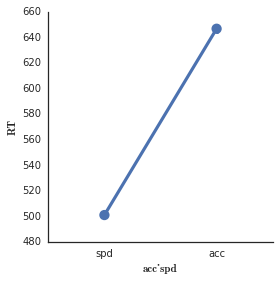

In [145]:
sns.factorplot('acc_spd', 'RT', data=df)

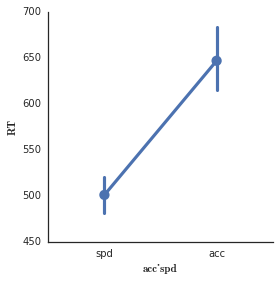

In [146]:
sns.factorplot('acc_spd', 'RT', data=df, units='subj_idx')

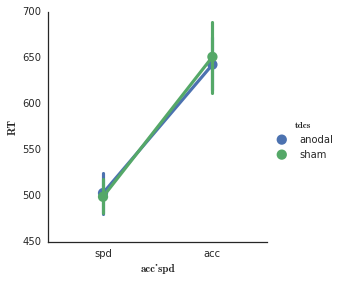

In [147]:
sns.factorplot('acc_spd', 'RT', 'tdcs', data=df, units='subj_idx')

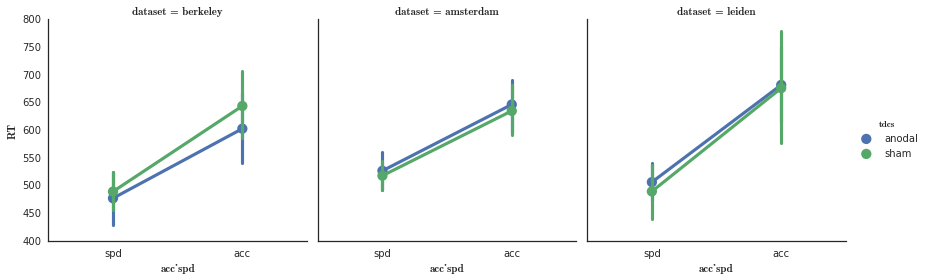

In [148]:
sns.factorplot('acc_spd', 'RT', 'tdcs', data=df, units='subj_idx', col='dataset')

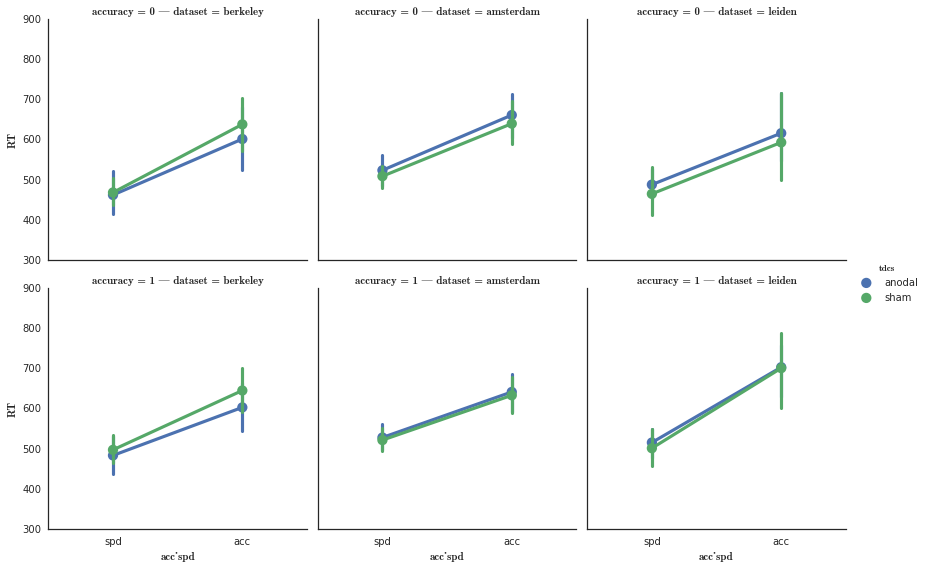

In [149]:
sns.factorplot('acc_spd', 'RT', 'tdcs', data=df, units='subj_idx', col='dataset', row='accuracy')

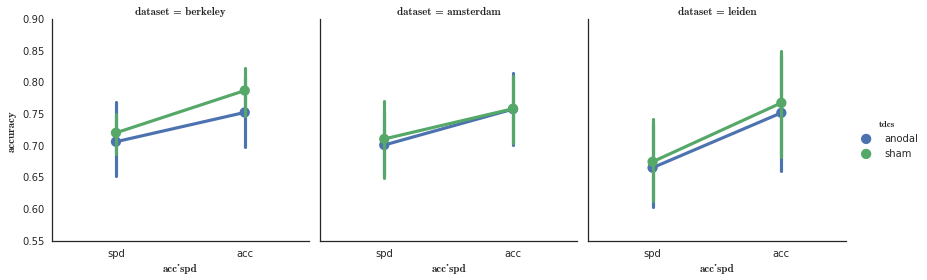

In [150]:
sns.factorplot('acc_spd', 'accuracy', 'tdcs', data=df, units='subj_idx', col='dataset')

In [151]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [152]:
%%R -i df

print(head(df))

print(summary(aov(RT ~ acc_spd*tdcs + Error(subj_idx/(tdcs * acc_spd)), data=df)))

library(BayesFactor)

   RT acc_spd accuracy angle block coherence  dataset   id left_right subj_idx
0 467     spd        1   180     2    0.4171 berkeley S1.2          1        1
1 427     acc        1   180     2    0.4171 berkeley S1.2          2        1
2 440     acc        1   180     2    0.4171 berkeley S1.2          1        1
3 454     acc        1   180     2    0.4171 berkeley S1.2          2        1
4 400     acc        1   180     2    0.4171 berkeley S1.2          1        1
5 414     acc        1   180     2    0.4171 berkeley S1.2          2        1
    tdcs trial_NR
0 anodal        1
1 anodal        2
2 anodal        3
3 anodal        4
4 anodal        5
5 anodal        6

Error: subj_idx
        Df  Sum Sq Mean Sq
acc_spd  1 8972204 8972204

Error: subj_idx:tdcs
        Df Sum Sq Mean Sq
acc_spd  1 259296  259296

Error: subj_idx:acc_spd
        Df    Sum Sq   Mean Sq
acc_spd  1 254330962 254330962

Error: subj_idx:tdcs:acc_spd
        Df  Sum Sq Mean Sq
acc_spd  1 1271348 1271348

Erro

In [153]:
df_subj.head()

,subj_idx,dataset,tdcs,acc_spd,RT,accuracy,angle,block,coherence,left_right,trial_NR
0,1,berkeley,anodal,acc,461.837288,1.000000,180.0,2.0,0.4171,1.494915,290.972881
1,1,berkeley,anodal,spd,443.265574,0.996721,180.0,2.0,0.4171,1.504918,309.714754
2,1,leiden,anodal,acc,789.293729,0.960396,180.0,1.0,0.2864,1.511551,310.181518
3,1,leiden,anodal,spd,547.451178,0.902357,180.0,1.0,0.2864,1.488215,290.622896
4,1,leiden,sham,acc,727.930159,0.977778,180.0,2.0,0.2864,1.501587,307.838095


In [154]:
%%R -i df_subj

print(summary(aov(RT ~ acc_spd*tdcs + Error(subj_idx/(tdcs * acc_spd)), data=df_subj)))

library(BayesFactor)

bf = anovaBF(RT ~ acc_spd*tdcs, data = df_subj, whichRandom=c("subj_idx", 'dataset'), whichModels='top')

print(bf)



Error: subj_idx
     Df Sum Sq Mean Sq
tdcs  1  31638   31638

Error: subj_idx:tdcs
     Df Sum Sq Mean Sq
tdcs  1  935.4   935.4

Error: subj_idx:acc_spd
        Df Sum Sq Mean Sq
acc_spd  1 835005  835005

Error: subj_idx:tdcs:acc_spd
        Df Sum Sq Mean Sq
acc_spd  1   4065    4065

Error: Within
              Df  Sum Sq Mean Sq F value  Pr(>F)   
acc_spd        1   92552   92552   8.235 0.00464 **
tdcs           1    2010    2010   0.179 0.67289   
acc_spd:tdcs   1    1904    1904   0.169 0.68117   
Residuals    166 1865653   11239                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from tdcs + acc_spd + tdcs:acc_spd , BF is...
[1] Omit acc_spd:tdcs : 3.674496    ±11.71%
[2] Omit acc_spd      : 8.65974e-14 ±11.55%
[3] Omit tdcs         : 5.64507     ±11.86%

Against denominator:
  RT ~ tdcs + acc_s

In [155]:
import nipype

In [156]:
from nipype.interfaces import fsl

In [157]:
mcflirt = fsl.MCFLIRT()

mcflirt.inputs.in_file = '/data/func_raw/pp0197/pp0197_B1.nii.gz'

r = mcflirt.run()

In [158]:
r.outputs


mat_file = <undefined>
mean_img = <undefined>
out_file = /home/ubuntu/notebooks/pp0197_B1_mcf.nii.gz
par_file = <undefined>
rms_files = <undefined>
std_img = <undefined>
variance_img = <undefined>

In [159]:
meaner = fsl.MeanImage()

meaner.inputs.in_file = r.outputs.out_file

r2 = meaner.run()

In [160]:
r2.outputs


out_file = /home/ubuntu/notebooks/pp0197_B1_mcf_mean.nii.gz

In [161]:
flirt = fsl.FLIRT()

flirt.inputs.in_file = r2.outputs.out_file
flirt.inputs.reference = '/data/struct/ANAT_pp0197.nii'

r3 = flirt.run()

In [162]:
r3.outputs


out_file = /home/ubuntu/notebooks/pp0197_B1_mcf_mean_flirt.nii.gz
out_log = /home/ubuntu/notebooks/pp0197_B1_mcf_mean_flirt.log
out_matrix_file = /home/ubuntu/notebooks/pp0197_B1_mcf_mean_flirt.mat

In [3]:
import hddm

Couldn't import dot_parser, loading of dot files will not be possible.


/usr/local/lib/python2.7/dist-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [4]:
df.head()

,RT,acc_spd,accuracy,angle,block,coherence,dataset,id,left_right,subj_idx,tdcs,trial_NR
0,467,spd,1,180,2,0.4171,berkeley,S1.2,1,1,anodal,1
1,427,acc,1,180,2,0.4171,berkeley,S1.2,2,1,anodal,2
2,440,acc,1,180,2,0.4171,berkeley,S1.2,1,1,anodal,3
3,454,acc,1,180,2,0.4171,berkeley,S1.2,2,1,anodal,4
4,400,acc,1,180,2,0.4171,berkeley,S1.2,1,1,anodal,5


In [5]:
## HDDM

In [6]:
df['rt'] = df.RT / 1000.
df['response'] = df.accuracy
df = df[(df.rt > .3) & (df.rt < 2.)]

In [7]:
df.head()

,RT,acc_spd,accuracy,angle,block,coherence,dataset,id,left_right,subj_idx,tdcs,trial_NR,rt,response
0,467,spd,1,180,2,0.4171,berkeley,S1.2,1,1,anodal,1,0.467,1
1,427,acc,1,180,2,0.4171,berkeley,S1.2,2,1,anodal,2,0.427,1
2,440,acc,1,180,2,0.4171,berkeley,S1.2,1,1,anodal,3,0.440,1
3,454,acc,1,180,2,0.4171,berkeley,S1.2,2,1,anodal,4,0.454,1
4,400,acc,1,180,2,0.4171,berkeley,S1.2,1,1,anodal,5,0.400,1


In [8]:
df[(df.subj_idx == 1) & (df.dataset == 'leiden')]

,RT,acc_spd,accuracy,angle,block,coherence,dataset,id,left_right,subj_idx,tdcs,trial_NR,rt,response
35401,1271,acc,1,180,1,0.2864,leiden,L1.1,2,1,anodal,2,1.271,1
35402,1337,acc,1,180,1,0.2864,leiden,L1.1,1,1,anodal,3,1.337,1
35403,568,spd,1,180,1,0.2864,leiden,L1.1,2,1,anodal,4,0.568,1
35404,535,spd,1,180,1,0.2864,leiden,L1.1,2,1,anodal,5,0.535,1
35405,401,spd,1,180,1,0.2864,leiden,L1.1,1,1,anodal,6,0.401,1
35406,1605,acc,1,180,1,0.2864,leiden,L1.1,2,1,anodal,7,1.605,1
35407,535,spd,1,180,1,0.2864,leiden,L1.1,1,1,anodal,8,0.535,1
35408,418,spd,1,180,1,0.2864,leiden,L1.1,2,1,anodal,9,0.418,1
35409,769,acc,1,180,1,0.2864,leiden,L1.1,2,1,anodal,10,0.769,1
35410,485,spd,1,180,1,0.2864,leiden,L1.1,1,1,anodal,11,0.485,1


In [9]:
model = hddm.HDDM(df[(df.subj_idx == 1) & (df.dataset == 'leiden')], depends_on={'a':['tdcs', 'acc_spd']})

In [19]:
model.sample(500, 250, 2)

 [-----------------100%-----------------] 500 of 500 complete in 7.0 sec

In [20]:
import pymc
pymc.__version__

'2.3.6'

In [21]:
import hddm
hddm.__version__

'0.5.5'

In [22]:
%mat

ERROR: Line magic function `%mat` not found.


Plotting a(acc.anodal)
Plotting a(acc.sham)
Plotting a(spd.anodal)
Plotting a(spd.sham)
Plotting v
Plotting t


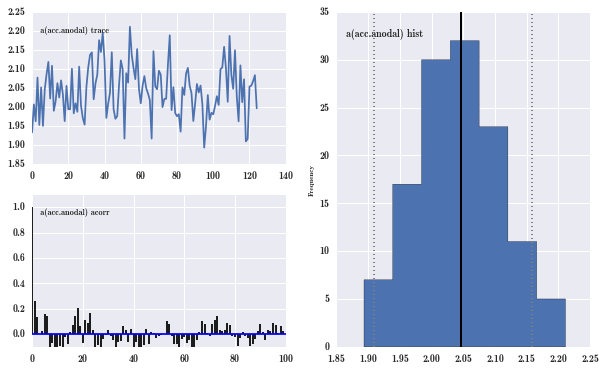

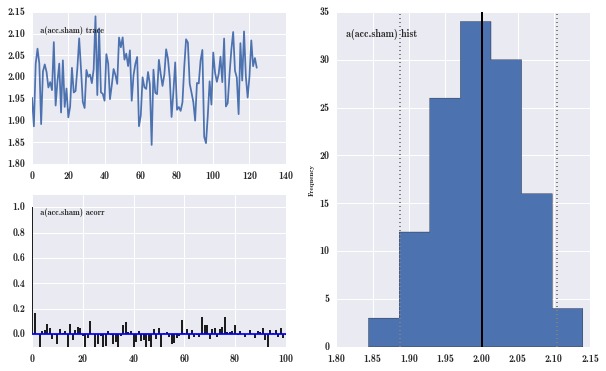

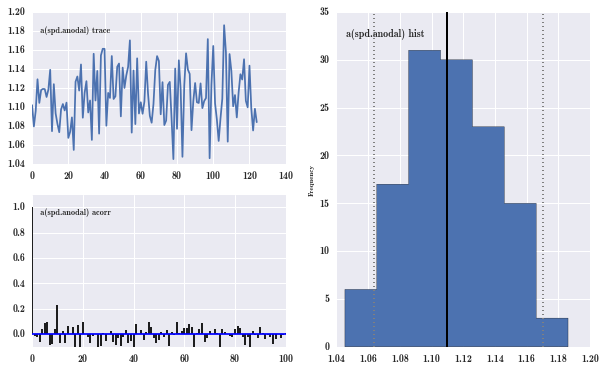

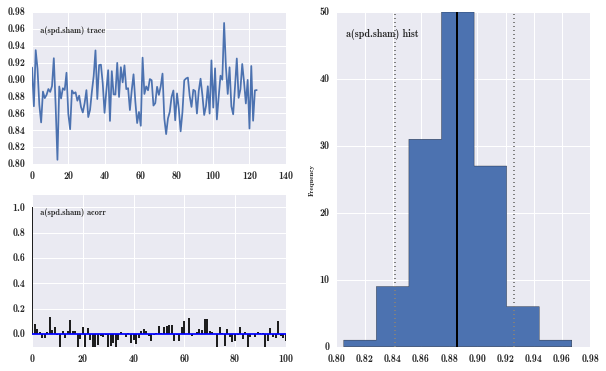

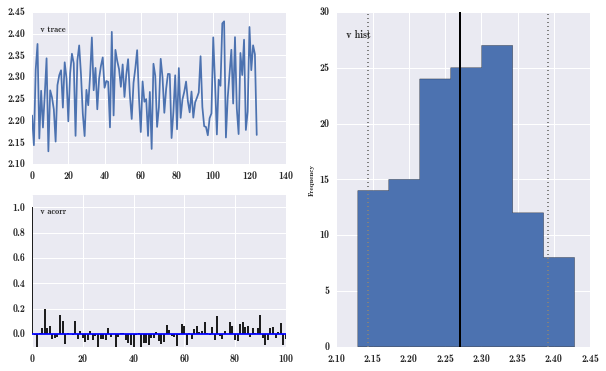

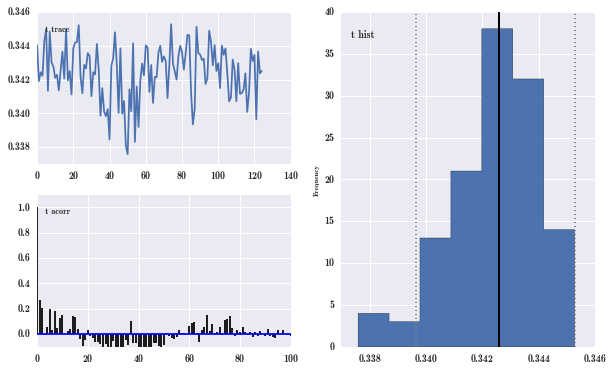

In [23]:
model.plot_posteriors()

In [24]:
model.print_stats()

                   mean        std      2.5q       25q       50q       75q     97.5q      mc err
a(acc.anodal)   2.06227   0.215467   1.91734   1.99277   2.04312   2.08517   2.21115   0.0204781
a(acc.sham)      1.9972   0.121551   1.84127   1.94653   1.98948   2.03048   2.15162  0.00808717
a(spd.anodal)   1.12331   0.100368   1.05012   1.09086   1.11101    1.1339   1.19045   0.0103705
a(spd.sham)    0.900864   0.126816  0.837906  0.867739  0.885075  0.900703  0.997396   0.0130634
v               2.26082   0.073173   2.12957   2.20931   2.26609   2.30761   2.40432  0.00570377
t              0.339223  0.0234707  0.320737  0.341283  0.342645  0.343601  0.344995  0.00247009
DIC: -799.961819
deviance: -805.602810
pD: 5.640991


In [26]:
traces = model.get_traces()

In [32]:
sns.set_context('poster')

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1298: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=400:stretch=normal:size=16.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1298: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=400:stretch=normal:size=17.6. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


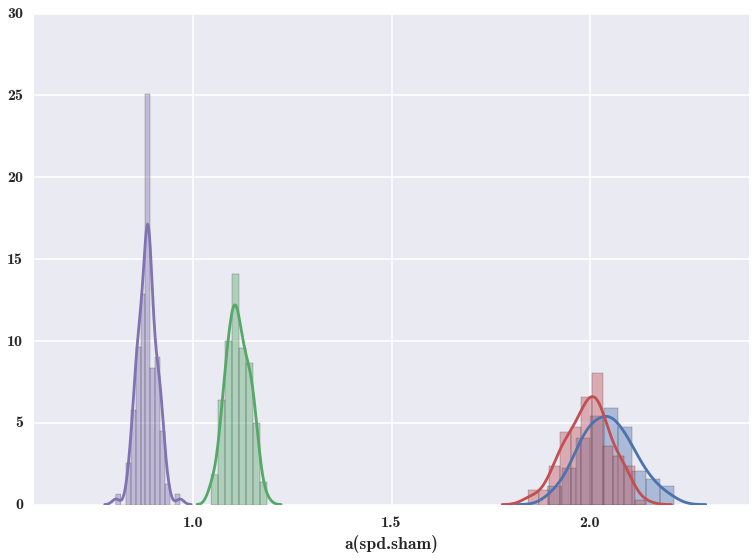

In [33]:
sns.distplot(traces['a(acc.anodal)'])
sns.distplot(traces['a(spd.anodal)'])

sns.distplot(traces['a(acc.sham)'])
sns.distplot(traces['a(spd.sham)'])

plt.legend()

# Pipelining

In [164]:
import nipype.pipeline.engine as pe
import nipype.interfaces.io as nio

In [169]:
workflow = pe.Workflow(name='registration', base_dir='/data/workflow_folders')

In [170]:
mcflirt = pe.Node(fsl.MCFLIRT(), name='mcflirt')

mcflirt.inputs.in_file = '/data/func_raw/pp0372/pp0372_B1.nii.gz'

meaner = pe.Node(fsl.MeanImage(), name='meaner')

flirt = pe.Node(fsl.FLIRT(), name='flirt')
flirt.inputs.reference = '/data/struct/ANAT_pp0372.nii'

workflow.connect(mcflirt, 'out_file', meaner, 'in_file')

workflow.connect(meaner, 'out_file', flirt, 'in_file')




workflow.run()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


RuntimeError: Workflow did not execute cleanly. Check log for details

In [ ]:
workflow.write_graph()

In [ ]:
from IPython.display import Image

In [ ]:
Image('/data/workflow_folders/registration/graph.dot.png')

In [ ]:
!ls /data/workflow_folders/registration/flirt_to_mni/

In [ ]:
workflow = pe.Workflow(name='registration', base_dir='/data/workflow_folders')

templates = {'func':'/data/func_raw/pp{subject_id}/pp{subject_id}_B{block}.nii.gz',
             'struct'}

selector = pe.Node()

mcflirt = pe.Node(fsl.MCFLIRT(), name='mcflirt')

mcflirt.inputs.in_file = '/data/func_raw/pp0372/pp0372_B1.nii.gz'

meaner = pe.Node(fsl.MeanImage(), name='meaner')

flirt = pe.Node(fsl.FLIRT(), name='flirt')
flirt.inputs.reference = '/data/struct/ANAT_pp0372.nii'

flirt_to_mni = pe.Node(fsl.FLIRT(), name='flirt_to_mni')

flirt_to_mni.inputs.reference = '/usr/share/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz'

workflow.connect(mcflirt, 'out_file', meaner, 'in_file')

workflow.connect(meaner, 'out_file', flirt, 'in_file')

workflow.connect(flirt, 'out_file', flirt_to_mni, 'in_file')

ds = pe.Node(nio.DataSink(), name='datasink')
ds.inputs.base_directory = '/data'

workflow.connect(flirt, 'out_file', ds, 'epi_in_anat_space')

workflow.run()